In [8]:
# Basic template
class Myclass():
    # static attributes or variable
    cvar1=20
    __cvar2=40 # private static variable
    
    # constructor
    def __init__(self,par1,par2):
        # instance attributes
        self.par1=par1
        self.par2=par2
        self.__par4=par1 # converted into private variable by adding '__'(double underscore).
        
        par3=par2 # this is not an instance attribute,it's just a local variable
        
        # calling an class method
        self.display_details()
    
    # static method created using static method.
    @staticmethod
    def static_methods():
        print(f"{Myclass.__cvar2} is static variable in static method" )
    
    # method used to describe the class. returns only string.
    def __str__(self):
        return str(self.par1)+str(self.__par4)+str(self.par2)
    # getter or accessor
    def get_par4(self):
        return self.__par4
    #setter or mutator
    def set_par4(self,value):
        self.__par4=value
    def display_details(self):
        print(f"{Myclass.cvar1} is static variable") # accessing a static varialbe using class name.
    def recall(self):
        #print('hai')
        print(f"{Myclass.__cvar2} is private static variable") # accessing a private static variable.

# creating an reference variable
m1=Myclass(10,30)
m2=Myclass(80,90)

# multiple references
m3=m2 # id(m3)==id(m2)

print(m1) # if there was __str__ method, it will invoke it and return it. else. print hexadecimal id.

# accessing an variable
print(m1.par1)

# accessing an private variable
print(m1._Myclass__par4) # not recommended. returning None now.

# accessing an instance method
print(m1.display_details()) # normal approach
print(Myclass.display_details(m1)) # complex approach ,not recommended. returning None now.
        
print(f"{Myclass.cvar1} is static variable")

#accessing the static method
Myclass.static_methods()

20 is static variable
20 is static variable
101030
10
10
20 is static variable
None
20 is static variable
None
20 is static variable
40 is static variable in static method


### Accesing an variables

To access the instance variables:-
    reference_variable.instance_variable.


### Inheritance:-
When one object is a type of another object

eg:- Mobile is a Product

### Aggregation:-
When one object owns another object, but they both have independent life cycle

eg:- Customer has an Address. Even if the Customer is no more, there may be other customers in that address. So Address continues to exist even after a customer is no more

### Composition:-
When one object owns another object, but they both have same life cycle

eg:- College has a department. If the college closes, the department is also closed

1. If class A owns class B, then class A is said to aggregate class B. This is also commonly known as "has-A" relationship.
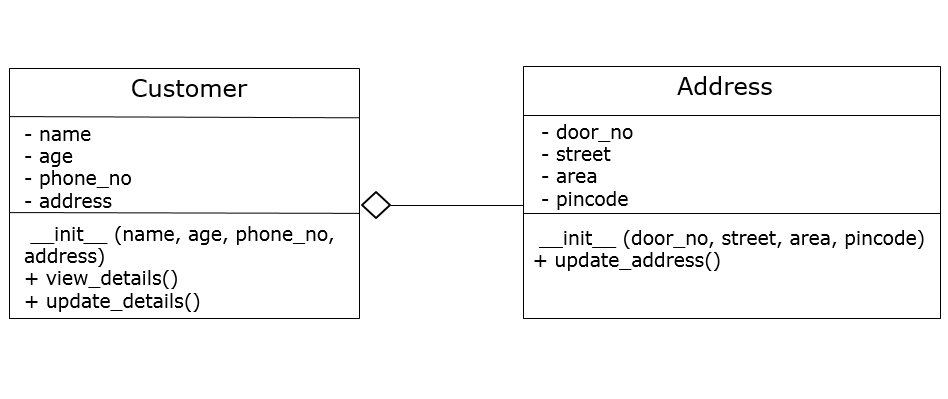

In [9]:
class A():
    def __init__(self,b):
        self.number=5
        self.name='game'
        self.B=b # the class A owns class B. aggregation link.
    def local_object(self):
        b=B() # dependency via local object
class B():
    def __init__(self):
        self.age=5
c=B()
a=A(c)
print(a.B.age)

5


### Inheritance
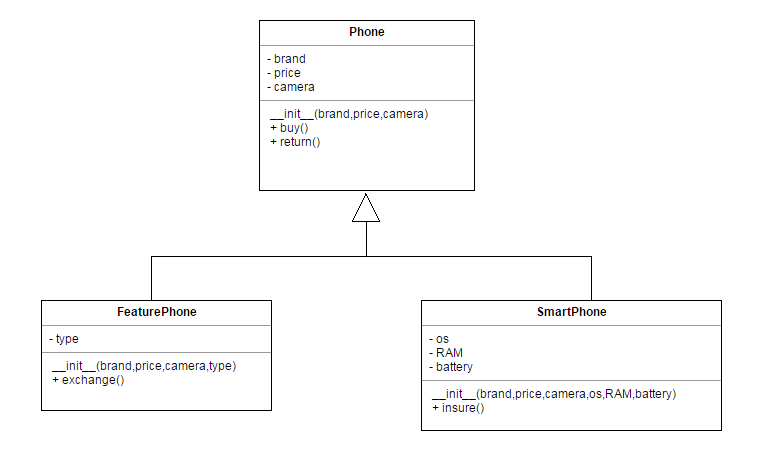
When a class inherits from another class, then those classes are said to have an inheritance relationship. The class which is inheriting is called the child/sub/derived class and the class which is getting inherited is called the parent/super/base class. Inheritance is also called as "is-A" relationship.

From a code perspective, a child class inherits:

Constructor

Non Private Attributes

Non Private Methods

private variables get inherited in Python

In [3]:
class parent():
    def __init__(self,par1,par2):
        self.par1=par1
        self.par2=par2
    def method(self):
        print(f"{self.par1} method in class parent")
class child1(parent):
    def __init__(self,par1,par2):
        super().__init__(par1,par2)
        self.par11=par1
    def method11(self):
        print("method11 in class child1")
class child2(parent):
    def method2(self):
        print("method21 in class child2")
        super().method()
p=child1(10,20)
p.method11()
#print(p.super().method()) # super class in used only in class
p1=child2() # if we have inherited a paramatrized constructor we must implement it.
p1.method2()

method11 in class child1


TypeError: parent.__init__() missing 2 required positional arguments: 'par1' and 'par2'

In [6]:
class parent():
    def __init__(self):
        self.age=5
    def method(self):
        print(f"{self.age}")
class child(parent):
    def method1(self):
        print(" method1 in child")
        super().method()
c=child()
c.method1()


 method1 in child
5



-> if your child class has constructor, then the parent class constructor will not invoke.
-> if we want to invoke the parent class constructor we need to 
-> child class did not directly inherit parent private classes.
-> if we want to have methods of parent which are overrided. then we need super() keyword.
-> if we have inherited parametrized constructor we should implement it by calling it.

### Inheritence Types

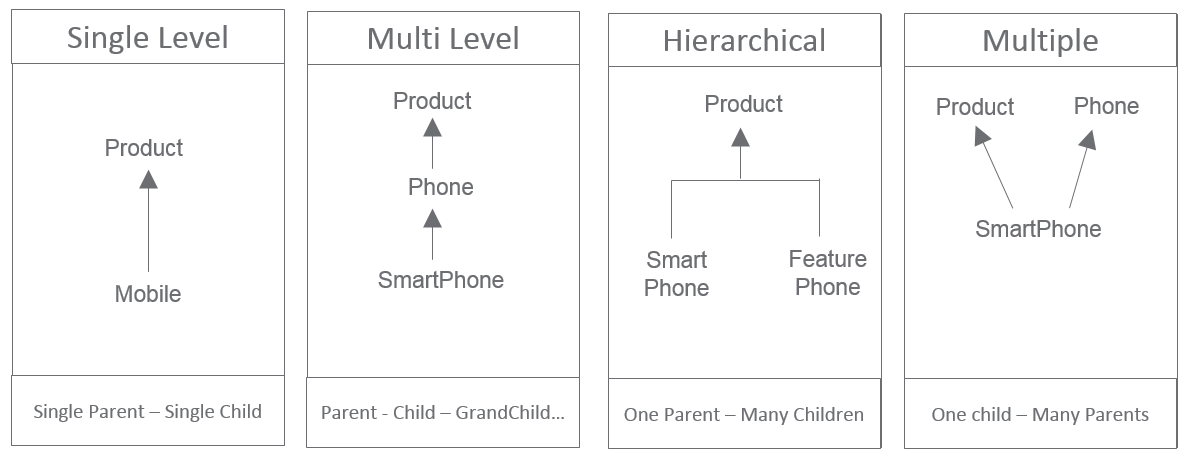

When a child is inheriting from multiple parents, and if there is a common behavior to be inherited, it inherits the method in Parent class which is first in the list.

## Abstract classes

In [7]:
# importing abstract classes
from abc import ABCMeta, abstractmethod

# creating an abstract classes
class myabstract(metaclass=ABCMeta):
    
    @abstractmethod
    def myabstractmethod(self):
        pass

In [14]:
import abc
from abc import ABC, abstractmethod
class abstractone(ABC):
    @property               # order must be followed
    @abstractmethod
    def my_abstract(self):
        pass
    @abc.abstractproperty
    def my_abstract1(self):
        pass
class concreteone(abstractone):
    @property
    def my_abstract(self):
        return "here the property was implemented"
    @property
    def my_abstract1(self):
        return "here the property was implemented"
c=concreteone()
print(c.my_abstract)
c.my_abstract1
    

here the property was implemented


'here the property was implemented'

In [15]:
class CreditCard:
    def __init__(self,card_no,balance):
        self.card_no=card_no
        self.balance=balance
class Customer:
    def __init__(self,cards):
        self.cards=cards
    def purchase_item(self, price, card_no):
        if price < 0:
            raise Exception("Invalid Price")
        if card_no not in self.cards:
            raise Exception("Wrong card")
        if price>self.cards[card_no].balance:
            raise Exception("Wrong card")
card1=CreditCard(101,800)
card2=CreditCard(102,2000)
cards={card1.card_no:card1,card2.card_no:card2}
c=Customer(cards)
while(True):
    card_no=int(input("Please enter a card number"))
    try:
        c.purchase_item(1200,card_no)
    except Exception as e:
        if str(e)=="Invalid Price":
            print("Product price is wrong")
            break
        if str(e)=="Wrong card":
            continue


Please enter a card number2
Please enter a card number2
Please enter a card number2
Please enter a card number3
Please enter a card number4
Please enter a card number5
Please enter a card number6
Please enter a card number123433
Please enter a card number123432
Please enter a card number1200


KeyboardInterrupt: Interrupted by user